In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV
import pickle

In [2]:
df = pd.read_csv('../Dataset/mergedData.csv')
label = df['label']

In [3]:
tf = TfidfVectorizer(ngram_range=(1,2))

In [4]:
tf_vec = tf.fit_transform(df['text'])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(
    tf_vec,label, test_size=0.3, shuffle=True, random_state=42,)

In [6]:
parameters = {
    'n_estimators':[100,200,300],
    'max_depth': [70, 80 , 90, 100]
}

In [7]:
model = RandomForestClassifier()

In [8]:
clf = GridSearchCV(model,param_grid=parameters,scoring='accuracy',cv = 2)

In [9]:
clf.fit(tf_vec,label)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [70, 80, 90, 100],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [10]:
clf.best_params_

{'max_depth': 90, 'n_estimators': 200}

In [11]:
model = RandomForestClassifier(n_estimators=100,max_depth=80)

In [12]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=80)

In [13]:
cross_val_score(model,tf_vec,label, scoring='accuracy')

array([0.89285714, 0.84700176, 0.83112875, 0.90163211, 0.90074989])

In [14]:
pred = model.predict(x_test)

In [16]:
print(classification_report(y_test,pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

# Calculate and print the F1 score
f1 = f1_score(y_test, pred)
print("F1 Score:", f1)

# Calculate and print the recall
recall = recall_score(y_test, pred)
print("Recall:", recall)

# Calculate and print the precision
precision = precision_score(y_test, pred)
print("Precision:", precision)

# Calculate and print the confusion matrix
cm = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(cm)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1591
           1       0.96      0.95      0.96      1811

    accuracy                           0.95      3402
   macro avg       0.95      0.95      0.95      3402
weighted avg       0.95      0.95      0.95      3402

Accuracy: 0.95326278659612
F1 Score: 0.9559678759346442
Recall: 0.9530646051905025
Precision: 0.9588888888888889
Confusion Matrix:
[[1517   74]
 [  85 1726]]


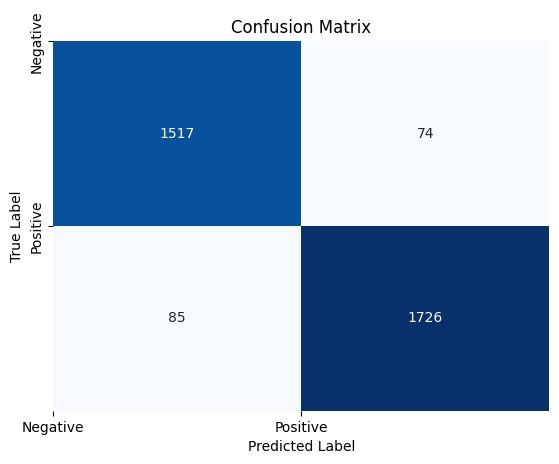

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred)

# Create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

# Set labels, title, and tick parameters
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.xticks(ticks=[0, 1], labels=["Negative", "Positive"])
plt.yticks(ticks=[0, 1], labels=["Negative", "Positive"])

# Display the plot
plt.show()

In [18]:
with open('tfidf_tokenizer.pkl','wb') as f:
    pickle.dump(tf,f)

with open('random_forest.pkl', 'wb') as f:
    pickle.dump(model,f)